In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  
#%matplotlib qt
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [2]:
white_patch_path = "TP1\white_patch"
coord_cromaticas_path = "TP1\coord_cromaticas"

In [70]:
#Armo funcion para pasaje a coordenadas cromáticas
def coord_crom(input_image:np.ndarray) -> np.ndarray: 
    height, width = input_image.shape[:2];
    img_new = np.zeros((height, width, 3), dtype = np.uint8)
    for y in range(height):
        for x in range(width):
            num = (input_image[y,x,0].astype(np.uint16) + input_image[y,x,1].astype(np.uint16) + input_image[y,x,2].astype(np.uint16))
            img_new[y,x,0] = (255 * input_image[y,x,0].astype(np.float64) / num).astype(np.uint8)
            img_new[y,x,1] = (255 * input_image[y,x,1].astype(np.float64) / num).astype(np.uint8)
            img_new[y,x,2] = (255 * input_image[y,x,2].astype(np.float64) / num).astype(np.uint8)
    return img_new

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_24056\3597710537.py:8: RuntimeWarning: invalid value encountered in double_scalars
  img_new[y,x,0] = (255 * input_image[y,x,0].astype(np.float64) / num).astype(np.uint8)
C:\Users\Alejandro\AppData\Local\Temp\ipykernel_24056\3597710537.py:9: RuntimeWarning: invalid value encountered in double_scalars
  img_new[y,x,1] = (255 * input_image[y,x,1].astype(np.float64) / num).astype(np.uint8)
C:\Users\Alejandro\AppData\Local\Temp\ipykernel_24056\3597710537.py:10: RuntimeWarning: invalid value encountered in double_scalars
  img_new[y,x,2] = (255 * input_image[y,x,2].astype(np.float64) / num).astype(np.uint8)


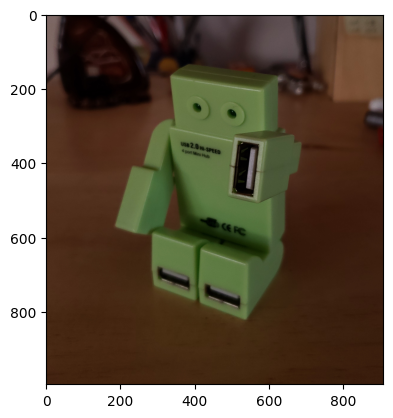

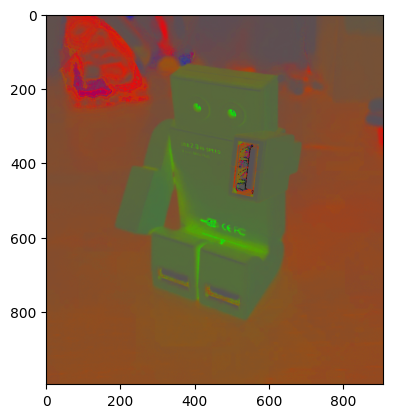

In [71]:
# Pruebo funcion de coordenadas cromaticas
path = coord_cromaticas_path + '\CoordCrom_2.png'
img_cc_1 = cv.imread(path, cv.IMREAD_COLOR)
img_cc_1 = cv.cvtColor(img_cc_1, cv.COLOR_BGR2RGB)

img_cc_1_changed = coord_crom(img_cc_1)

plt.figure()
plt.imshow(img_cc_1)
plt.show()

plt.figure()
plt.imshow(img_cc_1_changed)
plt.show()

In [77]:
#Armo funcion para white patch
def white_patch(input_image:np.ndarray) -> np.ndarray: 
    height, width = input_image.shape[:2];
    img_new = np.zeros((height, width, 3), dtype = np.uint8)
    max_value = (np.max(input_image[:,:,0]), np.max(input_image[:,:,1]), np.max(input_image[:,:,2]))
    for y in range(height):
        for x in range(width):
            num = (input_image[y,x,0].astype(np.uint16) + input_image[y,x,1].astype(np.uint16) + input_image[y,x,2].astype(np.uint16))
            img_new[y,x,0] = (255 * input_image[y,x,0].astype(np.float64) / max_value[0]).astype(np.uint8)
            img_new[y,x,1] = (255 * input_image[y,x,1].astype(np.float64) / max_value[1]).astype(np.uint8)
            img_new[y,x,2] = (255 * input_image[y,x,2].astype(np.float64) / max_value[2]).astype(np.uint8)
    return img_new

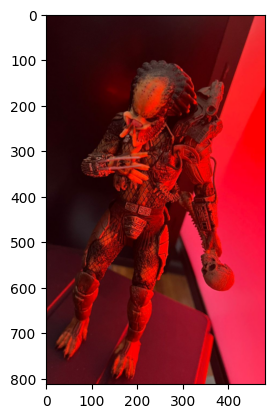

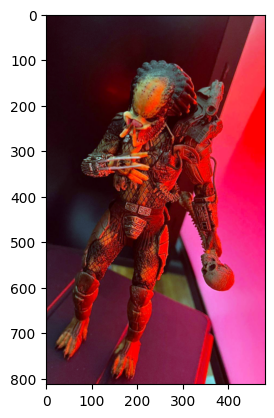

In [78]:
# Pruebo funcion de White Patch
path = white_patch_path + '\wp_red.png'
img_wp_1 = cv.imread(path, cv.IMREAD_COLOR)
img_wp_1 = cv.cvtColor(img_wp_1, cv.COLOR_BGR2RGB)

img_wp_1_changed = white_patch(img_wp_1)

plt.figure()
plt.imshow(img_wp_1)
plt.show()

plt.figure()
plt.imshow(img_wp_1_changed)
plt.show()

En el caso de white patch, si se tiene un punto blanco en la imagen (valores de los 3 canales en 255), entonces el algoritmo no hace nada. Simplemente devuelve lo mismo